<a href="https://colab.research.google.com/github/dominiquebuford/CV_project4/blob/main/CV_captioning_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qU openimages torch_snippets urllib3
from torch_snippets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.5 MB/s eta

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
!kaggle datasets download -d adityajn105/flickr8k
!unzip flickr8k

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [ ]:
import pandas as pd
import numpy as np
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import os
import shutil


In [ ]:
data_location =  "content/"
#copy dataloader
#!cp ../input/data-loader/data_loader.py .

#imports
import numpy as np
import torch
from torch.utils.data import DataLoader,Dataset
from torchvision import transforms
import torchvision.transforms as T

#custom imports
from data_loader import FlickrDataset,get_data_loader

In [ ]:
#split into training and test set
df = pd.read_csv('captions.txt')
paths = df['image'].unique().tolist()
train_paths, test_paths = train_test_split(paths, test_size=0.2, random_state=42)
final_test_paths, val_paths = train_test_split(test_paths, test_size = 0.5, random_state=42)

!mkdir train_images
!mkdir test_images
!mkdir val_images

destination_folder = 'train_images'
for path in train_paths:
  fullName = os.path.join('Images', path)
  if os.path.exists(fullName):
        # Construct the new path by combining the destination folder with the basename of the file
        # The basename is the name of the file, extracted from the file_path
        new_path = os.path.join(destination_folder, path)

        # Move the file to the new location
        shutil.move(fullName, new_path)

destination_folder = 'test_images'
for path in final_test_paths:
  fullName = os.path.join('Images', path)
  if os.path.exists(fullName):
        # Construct the new path by combining the destination folder with the basename of the file
        # The basename is the name of the file, extracted from the file_path
        new_path = os.path.join(destination_folder, path)

        # Move the file to the new location
        shutil.move(fullName, new_path)

destination_folder = 'val_images'
for path in val_paths:
  fullName = os.path.join('Images', path)
  if os.path.exists(fullName):
        # Construct the new path by combining the destination folder with the basename of the file
        # The basename is the name of the file, extracted from the file_path
        new_path = os.path.join(destination_folder, path)

        # Move the file to the new location
        shutil.move(fullName, new_path)


In [ ]:
df_train = df[df['image'].isin(train_paths)]
df_train.to_csv('train_captions.txt', sep=',', index=False, header=True)


In [ ]:
df_val = df[df['image'].isin(val_paths)]
df_val.to_csv('val_captions.txt', sep=',', index=False, header=True)

df_test = df[df['image'].isin(final_test_paths)]
df_test.to_csv('test_captions.txt', sep=',', index=False, header=True)

In [ ]:
#setting the constants
data_location =  "./"
BATCH_SIZE = 256
NUM_WORKER = 4

#defining the transform to be applied
transforms = T.Compose([
    T.Resize(226),
    T.RandomCrop(224),
    T.ToTensor(),
    T.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
])


train_dataset =  FlickrDataset(
    root_dir = data_location+"train_images",
    caption_file = data_location+"train_captions.txt",
    transform=transforms
)

#writing the dataloader
train_data_loader = get_data_loader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKER,
    shuffle=True,
    # batch_first=False
)



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


device(type='cuda', index=0)

In [ ]:
#vocab_size
vocab_size = len(train_dataset.vocab)

In [ ]:
test_dataset =  FlickrDataset(
    root_dir = data_location+"test_images",
    caption_file = data_location+"test_captions.txt",
    transform=transforms
)

#writing the dataloader
test_data_loader = get_data_loader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKER,
    shuffle=True,
    # batch_first=False
)

val_dataset =  FlickrDataset(
    root_dir = data_location+"val_images",
    caption_file = data_location+"val_captions.txt",
    transform=transforms
)

#writing the dataloader
val_data_loader = get_data_loader(
    dataset=val_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKER,
    shuffle=True,
    # batch_first=False
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import models
class EncoderCNN(nn.Module):
    def __init__(self):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)

        modules = list(resnet.children())[:-2]
        self.resnet = nn.Sequential(*modules)


    def forward(self, images):
        features = self.resnet(images)                                    #(batch_size,2048,7,7)
        features = features.permute(0, 2, 3, 1)                           #(batch_size,7,7,2048)
        features = features.view(features.size(0), -1, features.size(-1)) #(batch_size,49,2048)
        return features

In [ ]:
class Attention(nn.Module):
    def __init__(self, encoder_dim,decoder_dim,attention_dim):
        super(Attention, self).__init__()

        self.attention_dim = attention_dim

        self.W = nn.Linear(decoder_dim,attention_dim)
        self.U = nn.Linear(encoder_dim,attention_dim)

        self.A = nn.Linear(attention_dim,1)




    def forward(self, features, hidden_state):
        u_hs = self.U(features)     #(batch_size,num_layers,attention_dim)
        w_ah = self.W(hidden_state) #(batch_size,attention_dim)

        combined_states = torch.tanh(u_hs + w_ah.unsqueeze(1)) #(batch_size,num_layers,attemtion_dim)

        attention_scores = self.A(combined_states)         #(batch_size,num_layers,1)
        attention_scores = attention_scores.squeeze(2)     #(batch_size,num_layers)


        alpha = F.softmax(attention_scores,dim=1)          #(batch_size,num_layers)

        attention_weights = features * alpha.unsqueeze(2)  #(batch_size,num_layers,features_dim)
        attention_weights = attention_weights.sum(dim=1)   #(batch_size,num_layers)

        return alpha,attention_weights


In [ ]:
#Attention Decoder
class DecoderRNN(nn.Module):
    def __init__(self,num_layers, embed_size, vocab_size, attention_dim,encoder_dim,decoder_dim,drop_prob=0.3):
        super().__init__()

        #save the model param
        self.vocab_size = vocab_size
        self.attention_dim = attention_dim
        self.decoder_dim = decoder_dim

        self.embedding = nn.Embedding(vocab_size,embed_size)
        self.attention = Attention(encoder_dim,decoder_dim,attention_dim)


        self.init_h = nn.Linear(encoder_dim, decoder_dim)
        self.init_c = nn.Linear(encoder_dim, decoder_dim)
        self.lstm_cell = nn.LSTMCell(embed_size+encoder_dim,decoder_dim, bias=True)
        self.f_beta = nn.Linear(decoder_dim, encoder_dim)


        self.fcn = nn.Linear(decoder_dim,vocab_size)
        self.drop = nn.Dropout(drop_prob)



    def forward(self, features, captions):

        #vectorize the caption
        embeds = self.embedding(captions)

        # Initialize LSTM state
        h, c = self.init_hidden_state(features)  # (batch_size, decoder_dim)

        #get the seq length to iterate
        seq_length = len(captions[0])-1 #Exclude the last one
        batch_size = captions.size(0)
        num_features = features.size(1)

        preds = torch.zeros(batch_size, seq_length, self.vocab_size).to(device)
        alphas = torch.zeros(batch_size, seq_length,num_features).to(device)

        for s in range(seq_length):
            alpha,context = self.attention(features, h)
            lstm_input = torch.cat((embeds[:, s], context), dim=1)
            h, c = self.lstm_cell(lstm_input, (h, c))

            output = self.fcn(self.drop(h))

            preds[:,s] = output
            alphas[:,s] = alpha


        return preds, alphas

    def generate_caption(self,features,max_len=20,vocab=None):
        # Inference part
        # Given the image features generate the captions

        batch_size = features.size(0)
        h, c = self.init_hidden_state(features)  # (batch_size, decoder_dim)

        alphas = []

        #starting input
        word = torch.tensor(vocab.stoi['<SOS>']).view(1,-1).to(device)
        embeds = self.embedding(word)


        captions = []

        for i in range(max_len):
            alpha,context = self.attention(features, h)


            #store the apla score
            alphas.append(alpha.cpu().detach().numpy())

            lstm_input = torch.cat((embeds[:, 0], context), dim=1)
            h, c = self.lstm_cell(lstm_input, (h, c))
            output = self.fcn(self.drop(h))
            output = output.view(batch_size,-1)


            #select the word with most val
            predicted_word_idx = output.argmax(dim=1)

            #save the generated word
            captions.append(predicted_word_idx.item())

            #end if <EOS detected>
            if vocab.itos[predicted_word_idx.item()] == "<EOS>":
                break

            #send generated word as the next caption
            embeds = self.embedding(predicted_word_idx.unsqueeze(0))

        #covert the vocab idx to words and return sentence
        return [vocab.itos[idx] for idx in captions],alphas


    def init_hidden_state(self, encoder_out):
        mean_encoder_out = encoder_out.mean(dim=1)
        h = self.init_h(mean_encoder_out)  # (batch_size, decoder_dim)
        c = self.init_c(mean_encoder_out)
        return h, c

In [ ]:
class EncoderDecoder(nn.Module):
    def __init__(self,embed_size, vocab_size, attention_dim,encoder_dim,decoder_dim,drop_prob=0.3):
        super().__init__()
        self.encoder = EncoderCNN()
        self.decoder = DecoderRNN(
            num_layers = 2,
            embed_size=embed_size,
            vocab_size = vocab_size,
            attention_dim=attention_dim,
            encoder_dim=encoder_dim,
            decoder_dim=decoder_dim
        )

    def forward(self, images, captions):
        features = self.encoder(images)
        outputs = self.decoder(features, captions)
        return outputs

In [ ]:
#Hyperparams
embed_size=300
vocab_size = len(train_dataset.vocab)
attention_dim=256
encoder_dim=2048
decoder_dim=512
learning_rate = 3e-4

In [ ]:
model = EncoderDecoder(
    embed_size=300,
    vocab_size = len(train_dataset.vocab),
    attention_dim=256,
    encoder_dim=2048,
    decoder_dim=512
).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=train_dataset.vocab.stoi["<PAD>"])
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 154MB/s]


In [ ]:

#helper function to save the model
def save_model(model,num_epochs):
    model_state = {
        'num_epochs':num_epochs,
        'embed_size':embed_size,
        'vocab_size':len(train_dataset.vocab),
        'attention_dim':attention_dim,
        'encoder_dim':encoder_dim,
        'decoder_dim':decoder_dim,
        'state_dict':model.state_dict()
    }

    torch.save(model_state,'attention_model_state.pth')

In [ ]:
import matplotlib.pyplot as plt
def show_image(img, title=None):
    """Imshow for Tensor."""

    #unnormalize
    img[0] = img[0] * 0.229
    img[1] = img[1] * 0.224
    img[2] = img[2] * 0.225
    img[0] += 0.485
    img[1] += 0.456
    img[2] += 0.406

    img = img.numpy().transpose((1, 2, 0))


    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 1 loss: 4.26603

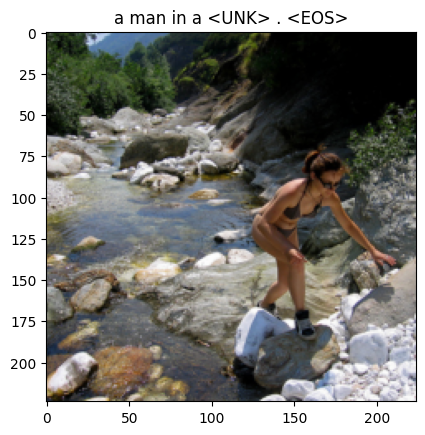

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 2 loss: 3.71174

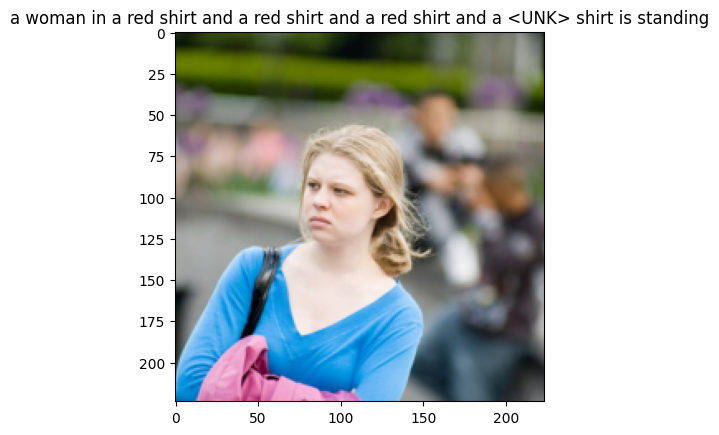

KeyboardInterrupt: 

In [ ]:
num_epochs = 20
print_every = 100

for epoch in range(1,num_epochs+1):
    for idx, (image, captions, stringcaption) in enumerate(iter(train_data_loader)):
        image,captions = image.to(device),captions.to(device)

        # Zero the gradients.
        optimizer.zero_grad()

        # Feed forward
        outputs,attentions = model(image, captions)

        # Calculate the batch loss.
        targets = captions[:,1:]
        loss = criterion(outputs.view(-1, vocab_size), targets.reshape(-1))

        # Backward pass.
        loss.backward()

        # Update the parameters in the optimizer.
        optimizer.step()

        if (idx+1)%print_every == 0:
            print("Epoch: {} loss: {:.5f}".format(epoch,loss.item()))


            #generate the caption
            model.eval()
            with torch.no_grad():
                dataiter = iter(val_data_loader)
                img,_ = next(dataiter)
                features = model.encoder(img[0:1].to(device))
                caps,alphas = model.decoder.generate_caption(features,vocab=train_dataset.vocab)
                caption = ' '.join(caps)
                show_image(img[0],title=caption)

            model.train()

#save the latest model
save_model(model,epoch)

In [ ]:
#prep for BLEU evaluation on test set

#

# Load the weights from the file into the model

checkpoint = torch.load('attention_model_state.pth')

# Access the actual state_dict for the model
model_state_dict = checkpoint['state_dict']

# Load the state_dict into your model
model.load_state_dict(model_state_dict)
#model.load_state_dict(torch.load('attention_model_state.pth', map_location=device))

model.eval()
reference_captions = []
generated_captions = []

for img, captions_vec, captions in val_data_loader:
  # Process each image in the batch
  for i in range(img.size(0)):
    features = model.encoder(img[i:i+1].to(device))  # Process each image individually
    caps, alphas = model.decoder.generate_caption(features, vocab=train_dataset.vocab)
    caps = caps[:-1]
    caption = ' '.join(caps)
    generated_captions.append(caption)
    #s_caption = [test_dataset.vocab.itos[x] for x in captions[i].tolist()]
    reference_captions.append(captions[i])

for i in range(5):  # Show first 5 results as an example
    print("Generated:", generated_captions[i])
    print("Reference:", reference_captions[i])


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Generated: a boy in a red shirt is holding a red toy in a red shirt and a boy in

Reference: The little boy in the red jacket is casting a shadow .

Generated: a person is climbing a rock .

Reference: A child on a rock formation .

Generated: a person is jumping off a cliff into the air .

Reference: Hang glider floating through the air above many green trees .

Generated: a girl in a pink dress is jumping in a pink dress .

Reference: The little girl has a purple dress on .

Generated: a snowboarder is jumping over a snowy hill .

Reference: A man stands at dusk on an almost-pristine , snowy road , lit only by headlights .

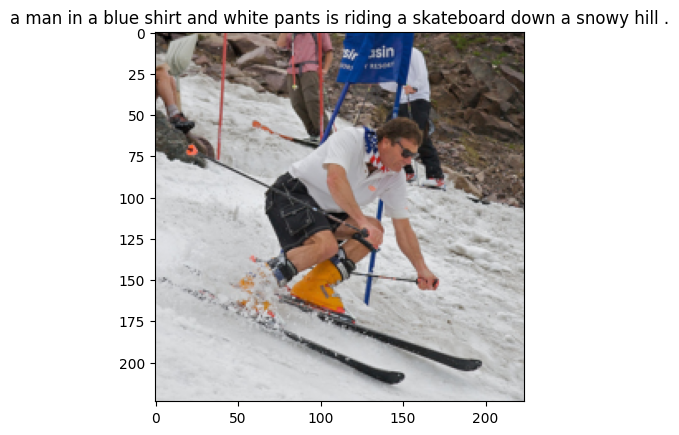

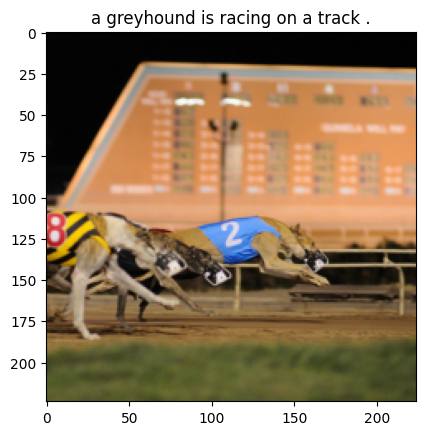

KeyboardInterrupt: 

In [ ]:
for img, captions_vec, captions in test_data_loader:
  # Process each image in the batch
  for i in range(img.size(0)):
    features = model.encoder(img[i:i+1].to(device))  # Process each image individually
    caps, alphas = model.decoder.generate_caption(features, vocab=train_dataset.vocab)
    caps = caps[:-1]
    caption = ' '.join(caps)
    show_image(img[i],title=caption)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


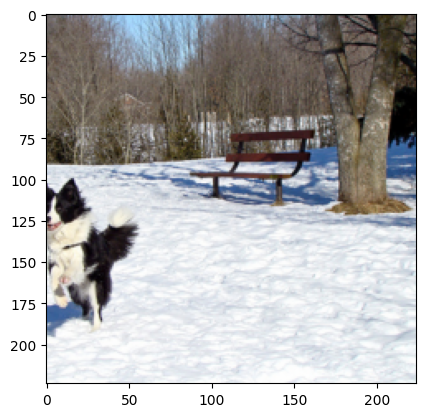

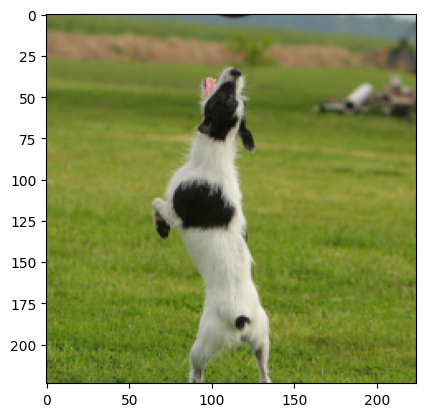

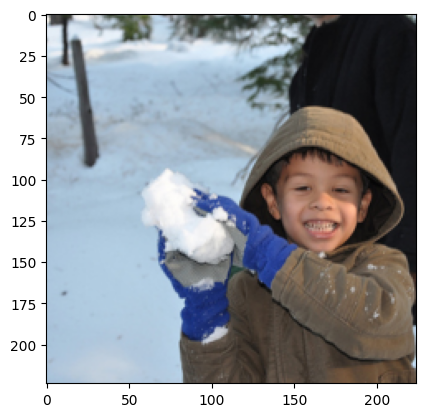

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Exception ignored in: <function _xla_gc_callback at 0x7f71f0506200>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


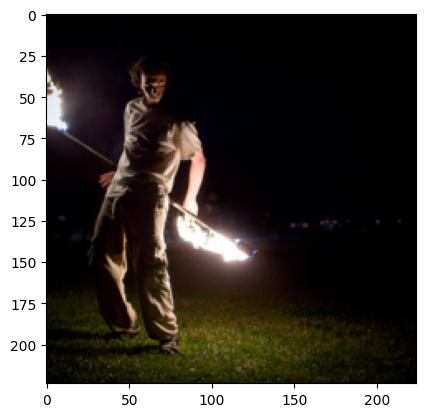

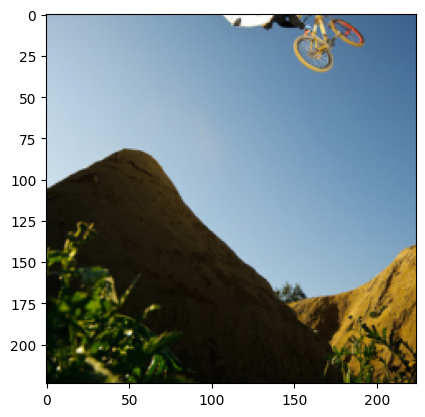

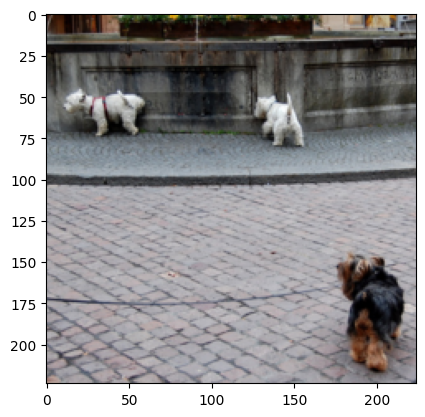

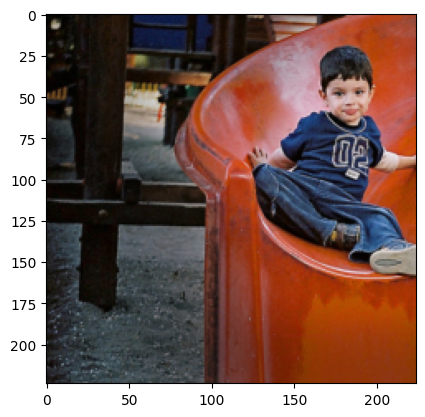

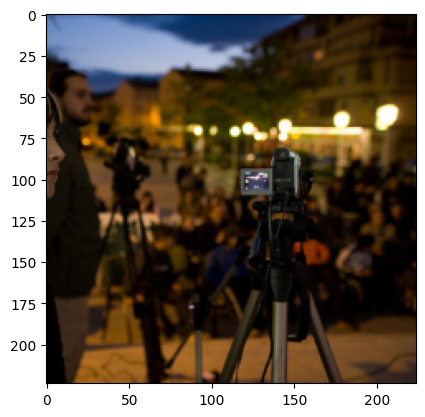

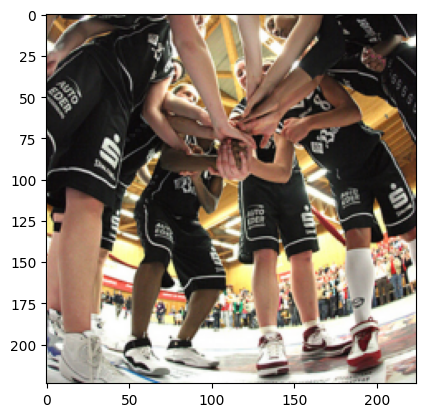

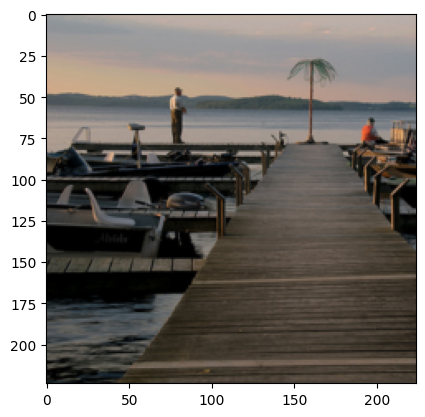

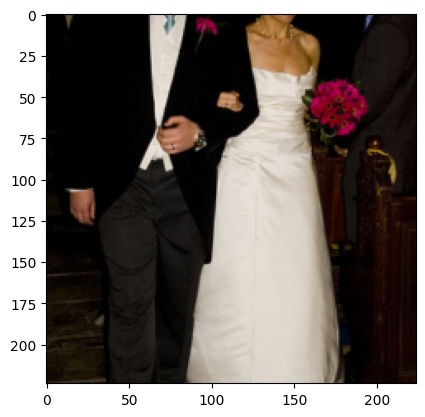

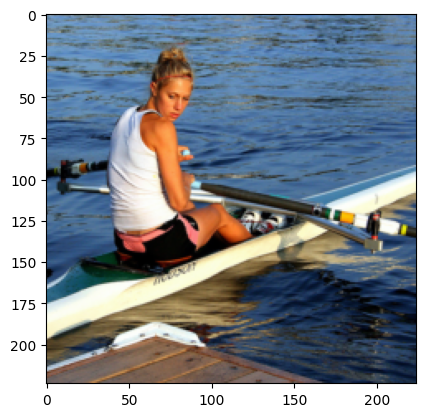

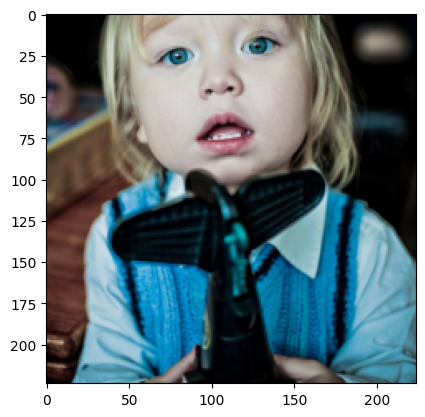

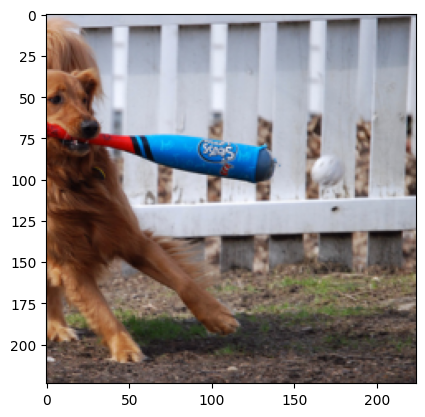

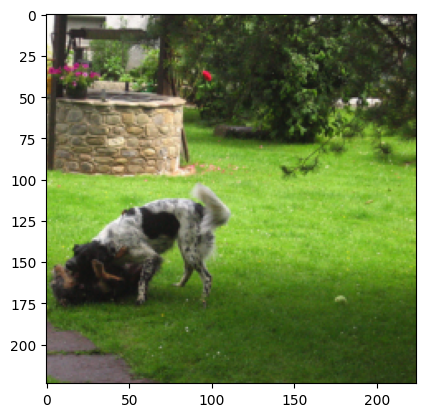

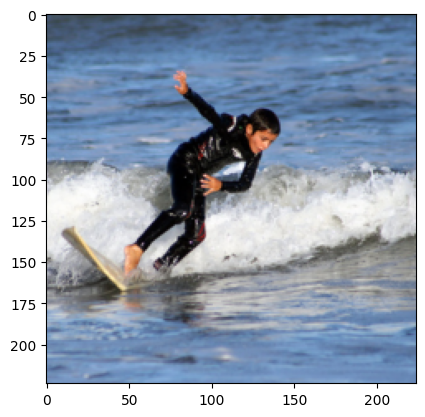

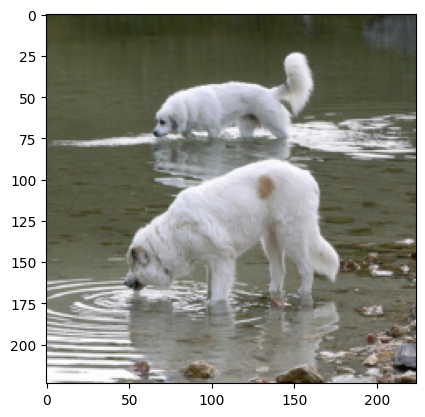

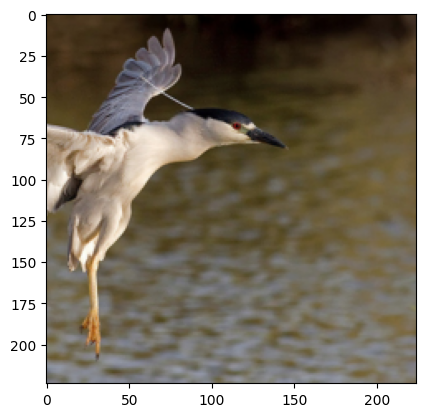

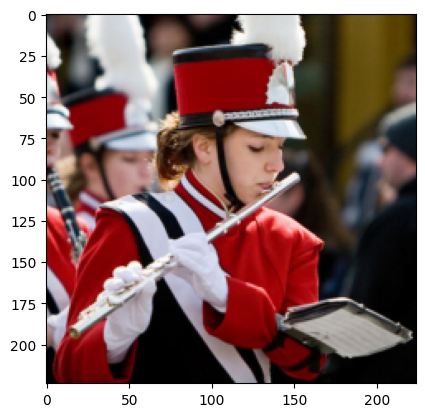

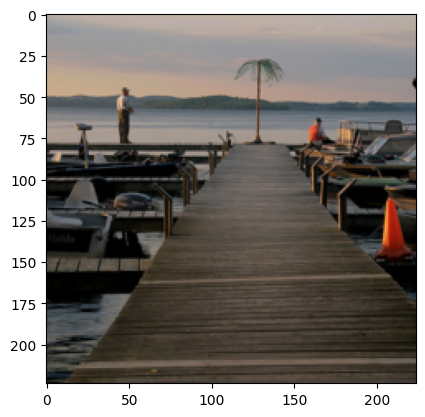

KeyboardInterrupt: 

In [ ]:
for img, captions_vec, captions in val_data_loader:
  # Process each image in the batch
  for i in range(img.size(0)):
    show_image(img[i])

In [ ]:
#Evaluation on test set , closer to 1 the better
!pip install nltk
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
smoothie = SmoothingFunction().method4
bleu_score = corpus_bleu(reference_captions[1:2], generated_captions[1:2], smoothing_function = smoothie)

In [ ]:
reference_captions[1]

'A child on a rock formation .'

In [ ]:
bleu_score

0.017420609414169196

In [ ]:
from nltk.translate.meteor_score import meteor_score

tokenized_reference_captions = [test_dataset.vocab.tokenize(ref) for ref in reference_captions]
tokenized_generated_captions = [train_dataset.vocab.tokenize(cand) for cand in generated_captions]
meteor_scores = [meteor_score([ref], cand) for ref, cand in zip(tokenized_reference_captions, tokenized_generated_captions)]
average_meteor = sum(meteor_scores) / len(meteor_scores)

#print("METEOR Scores: ", meteor_scores)
print("Average METEOR Score: ", average_meteor)


Average METEOR Score:  0.27634635981295824

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine all captions to ensure vocabulary consistency
all_captions = generated_captions + reference_captions

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(all_captions)  # Fit to all captions to get a consistent vocabulary

# Transform captions into vectors
gen_vecs = vectorizer.transform(generated_captions)
exp_vecs = vectorizer.transform(reference_captions)

# Compute cosine similarities
similarities = [cosine_similarity(gen_vecs[i], exp_vecs[i])[0][0] for i in range(len(generated_captions))]

# Display the cosine similarities
print(similarities)

[
    0.26215549100315755,
    0.2449095700610162,
    0.11129890195926301,
    0.3603143882325498,
    0.09352399946619891,
    0.07799388120446592,
    0.0,
    0.0242602938061575,
    0.05605246062698968,
    0.0,
    0.08406680198631356,
    0.24435988704477535,
    0.05745089875184661,
    0.03776223512873865,
    0.0691556809035545,
    0.30443056292828674,
    0.09784994170049856,
    0.07280929534558249,
    0.5792811726373319,
    0.24125504390381802,
    0.021082464966953308,
    0.04424286239838743,
    0.08156181116115988,
    0.22850213907900876,
    0.0955293031823249,
    0.018723241827696573,
    0.0,
    0.025422351549528575,
    0.1553405232342064,
    0.25645348049913874,
    0.2500756836852509,
    0.45109599287096874,
    0.18466398178730697,
    0.05531761258597862,
    0.3877210606836168,
    0.0,
    0.19102380616888898,
    0.32854675011924406,
    0.023480471314670154,
    0.06441571635810751,
    0.47959602118433875,
    0.0,
    0.0757452258444963,
    0.013787959906536612,
    0.045565757509490795,
    0.11163252488729938,
    0.0,
    0.424354422397968,
    0.027494089924809024,
    0.17693750526388247,
    0.013128489571666362,
    0.23799075658622731,
    0.10590169602166663,
    0.14215165120816003,
    0.22503383547181036,
    0.29033857572726274,
    0.03445189447857133,
    0.021644470282922126,
    0.1861819828426805,
    0.054274332143893725,
    0.23541104872925728,
    0.043979253778925705,
    0.06089417812305593,
    0.08221003007559974,
    0.1823467552258857,
    0.10470292101223956,
    0.044233767669068065,
    0.6693409481732057,
    0.6746746660103152,
    0.0,
    0.2144862400870638,
    0.2372917774064744,
    0.12192493658839683,
    0.23091463375213644,
    0.04041517589460339,
    0.5057424396376381,
    0.20854544762352978,
    0.04617599296765797,
    0.4950956301391385,
    0.27726332475075843,
    0.0,
    0.26403927036776137,
    0.0,
    0.0,
    0.0,
    0.1693147441675461,
    0.09109126331641076,
    0.2055369189131901,
    0.10166466276647466,
    0.0,
    0.05893884747908629,
    0.0,
    0.29941487385521964,
    0.13687762577779267,
    0.11215061038511365,
    0.0,
    0.02306314803159326,
    0.0,
    0.06123827980068231,
    0.0174735452561978,
    0.038823671901122146,
    0.0600701524432297,
    0.1500845734419255,
    0.47516744908819175,
    0.7021024228902191,
    0.16760593378799418,
    0.0,
    0.36107241363293524,
    0.37491224766212994,
    0.07317760817166084,
    0.18849313623332692,
    0.03574743292881784,
    0.019446477892427056,
    0.6440003463144925,
    0.4492336370371871,
    0.1416621248963471,
    0.31872545262920954,
    0.12339931280045059,
    0.05335763696264506,
    0.24141331652835352,
    0.20146931017714476,
    0.4891600657538056,
    0.0953867715286319,
    0.13062982942682466,
    0.27851120394721895,
    0.06143267342079262,
    0.3710583042574672,
    0.08240357913883159,
    0.0,
    0.0,
    0.30748106453390334,
    0.11933707075923623,
    0.0,
    0.0,
    0.0350216158168721,
    0.0,
    0.07353129843874819,
    0.023653250700902205,
    0.7059271272801949,
    0.20459621332149214,
    0.0,
    0.026450221272904025,
    0.033743712999704356,
    0.0,
    0.17970301799574578,
    0.5343350496204246,
    0.01784105229994393,
    0.3739904237676125,
    0.09544059882147582,
    0.0,
    0.03261672554832354,
    0.32561531392075416,
    0.05880855634147687,
    0.031423255433195386,
    0.2742772230687647,
    0.13171578435183579,
    0.1510376193742396,
    0.0,
    0.1575118377526579,
    0.05650133014313283,
    0.19963077775589538,
    0.18895774928075598,
    0.0,
    0.0,
    0.03115980035060497,
    0.2344398861255203,
    0.1931113742893864,
    0.0,
    0.12230010839992289,
    0.0,
    0.2652374450811976,
    0.13440329656036135,
    0.2168716427310017,
    0.3981857389523167,
    0.22441430942138493,
    0.017516711574246013,
    0.0,
    0.4763579825866342,
    0.07268763249653841,
    0.0,
    0.35751133898020

In [ ]:
print(sum(similarities)/len(similarities))

0.16891480085289617

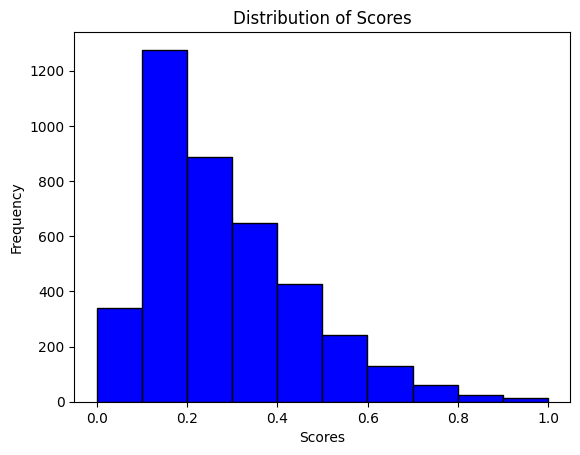

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.hist(meteor_scores, bins=10, color='blue', edgecolor='black')  # You can adjust the number of bins

# Adding titles and labels
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True